### Применение кластеризации 

#### Применение кластеризации к задачам с разметкой. Она позволит увидеть в данных структуру и понять, какие признаки важнее.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

data = pd.read_csv('/datasets/segments.csv')

# Обучение модели
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Центроиды кластеров:")
print(model.cluster_centers_)

In [1]:
''' Центроиды кластеров:
[[40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]
 [10.68632155 98.90275017 10.856     ]] '''

' Центроиды кластеров:\n[[40.14472236 15.00741697  8.56      ]\n [10.90357994 29.90244865 15.096     ]\n [10.68632155 98.90275017 10.856     ]] '

#### Передача модели начальных центроидов.


In [ ]:
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Центроиды кластеров:")
print(model.cluster_centers_)

# Обучение модели с начальными центроидами
model_init = KMeans(n_clusters=3, init=centers, random_state=12345)
model_init.fit(data)

print("Центроиды кластеров для модели с начальными центроидами:")
print(model_init.cluster_centers_)

'''
Центроиды кластеров:

[[40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]
 [10.68632155 98.90275017 10.856     ]]
 
Центроиды кластеров для модели с начальными центроидами:

[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]]
'''

#### Добавление к коду подсчёт целевой функции для двух моделей: без начальных центроидов и с ними. 

Сравнение значения целевой функции для обеих моделей.

In [ ]:
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print("Целевая функция:")
print(model.inertia_)

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

print("Целевая функция модели с начальными центроидами:")
print(model.inertia_)

Целевая функция:
68431.50999400369

Целевая функция модели с начальными центроидами:
74253.20363562094

### Обучим модель с начальными центроидами centers. 

Построим диаграмму pairplot с заливкой по кластерам и центроидами полученных кластеров. Начальные центроиды добавим отдельным слоем без заливки.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = pd.read_csv('https://code.s3.yandex.net/datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Дополнительный слой для центроидов
# Сформируем таблицу для дополнительного слоя
centroids_init = pd.DataFrame([[20, 80, 8], [50, 20, 5], [20, 30, 10]], \
                             columns=data.drop(columns=['label']).columns)
# Сформируем "заглушку"
centroids_init['label'] = 4
pairgrid.data = centroids_init 
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

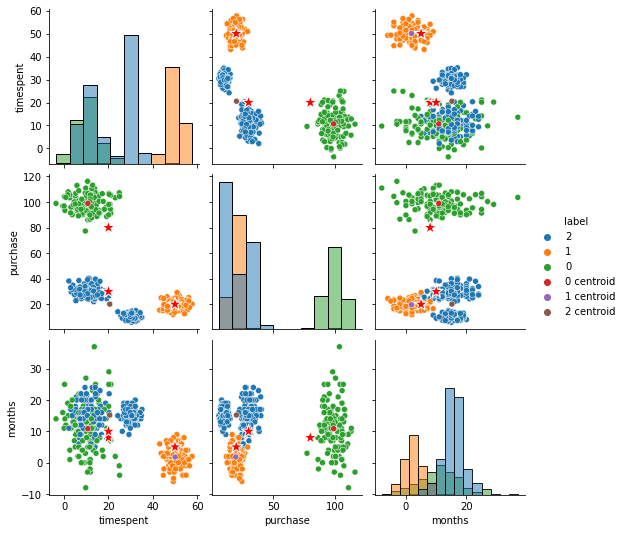

### Выведим на экран значения целевой функции для количества кластеров — от 1 до 7. 

In [ ]:
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    print('Число кластеров:', k) 
    print('Значение целевой функции', model.inertia_)

Число кластеров: 1
Значение целевой функции 782222.4354730697

Число кластеров: 2
Значение целевой функции 161733.64953602126

Число кластеров: 3
Значение целевой функции 68431.50999400369

Число кластеров: 4
Значение целевой функции 27110.79024796993

Число кластеров: 5
Значение целевой функции 22468.766585439167

Число кластеров: 6
Значение целевой функции 19960.565605742842

Число кластеров: 7
Значение целевой функции 18257.632605610874

#### Обучим модель для четырёх кластеров. Центроиды укажим так: ['0 centroid', '1 centroid', '2 centroid', '3 centroid'].  

Построим диаграмму pairplot с полученными центроидами и заливкой для модели. 

In [ ]:
# Обучение модели для 4-х кластеров
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
data_all = pd.concat([data, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist')

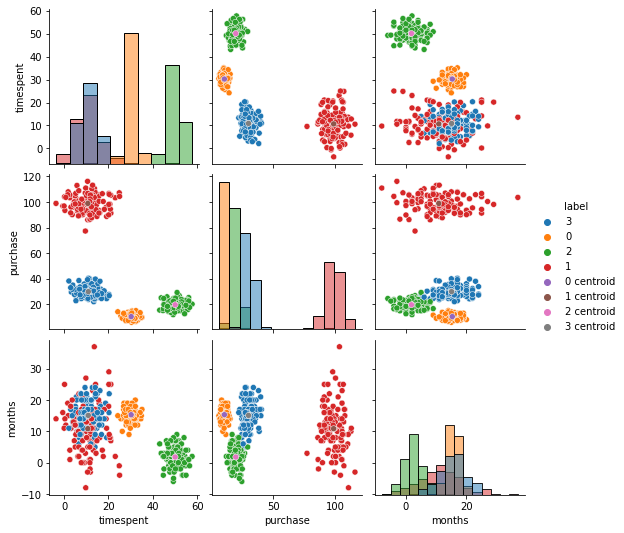

### Обучим модель для трёх и четырёх кластеров. 

Выведим на экран округлённые центроиды полученных моделей.

In [ ]:
# Обучение модели для 3-х кластеров
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

print("Типичные пользователи сегментов для 3-х кластеров:")
print(model.cluster_centers_.round())

# Обучение модели для 4-х кластеров
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

print("Типичные пользователи сегментов для 4-х кластеров:")
print(model.cluster_centers_.round())

Типичные пользователи сегментов для 3-х кластеров:
[[40. 15.  9.]
 [11. 30. 15.]
 [11. 99. 11.]]


Типичные пользователи сегментов для 4-х кластеров:
[[30. 10. 15.]
 [11. 99. 11.]
 [50. 20.  2.]
 [11. 30. 15.]]

### Поиск структуры в данных

#### Построим график метода локтя для количества кластеров от 1 до 10. 

Составим список distortion значений целевой функции для количества кластеров от 1 до 10.


In [ ]:
distortion=[]
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

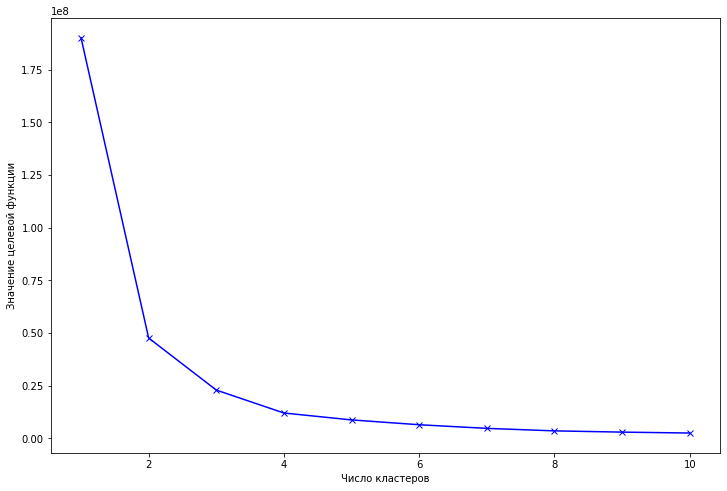

#### Построим диаграмму pairplot для модели с тремя кластерами без отмеченных центроидов. 


In [ ]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

data['label'] = model.labels_.astype(str)
sns.pairplot(data, hue='label', vars=data.columns[:-1], diag_kind='hist')

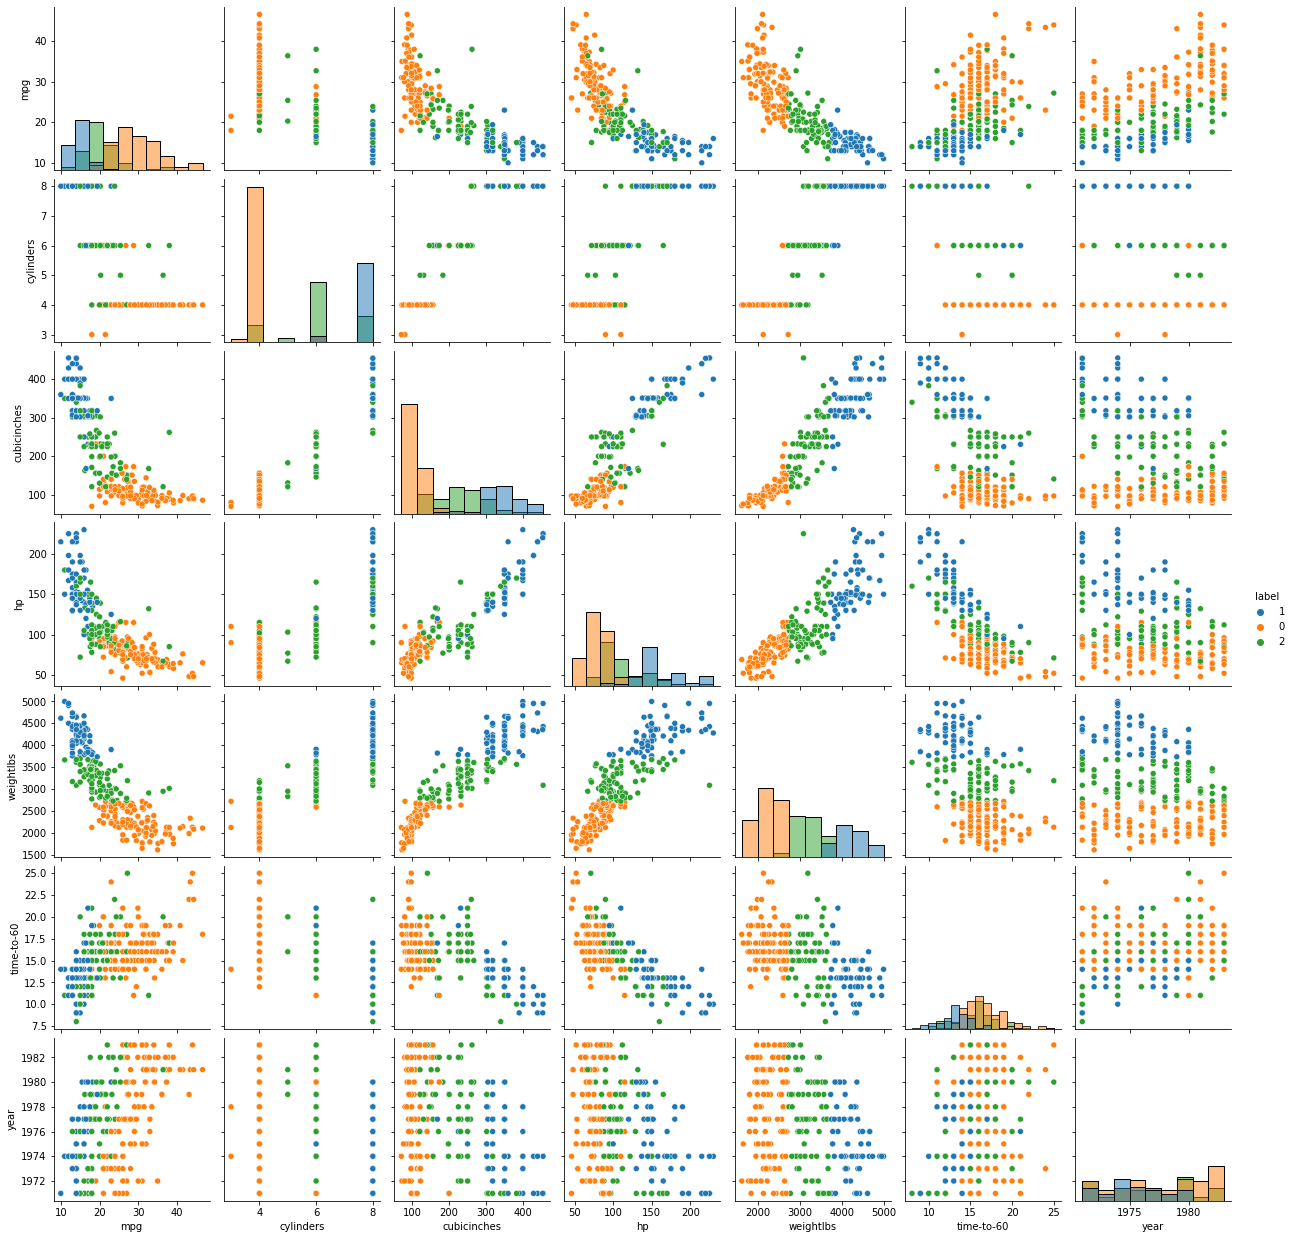

### Построим диаграмму pairplot с заливкой по столбцу brand. 

Обучим модель с тремя кластерами на данных без столбца brand. Добавим на график полученные центроиды.

In [ ]:
# Обучение модели
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)
 
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data_full = pd.concat([data_full], ignore_index=True)
 
# Построение графика
pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
centroids['brand'] = 4
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

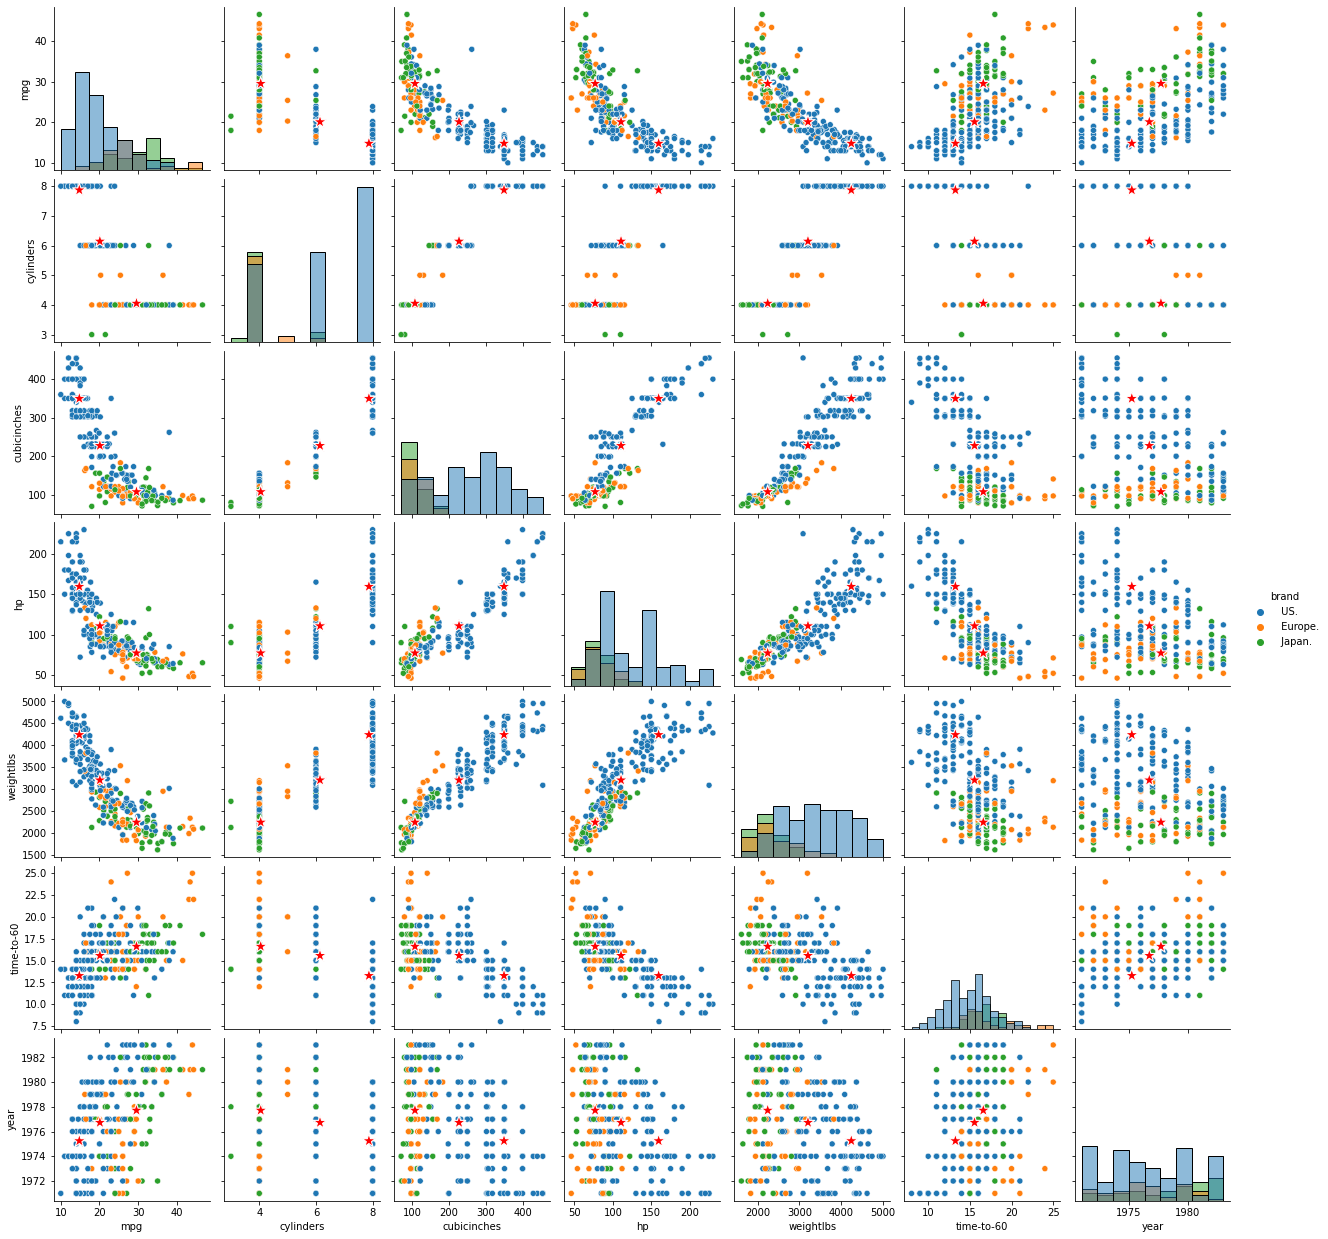